In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,RobustScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [2]:
data=pd.read_csv('loan_dataset.csv')

In [3]:
df=data.copy()
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,NaN,No,9600000,29900000,12,778,2400000.0,17600000.0,NaN,8000000.0,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,NaN,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000.0,NaN,33300000.0,12800000.0,Rejected
3,4,3,NaN,No,8200000,30700000,8,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [4]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [5]:
df.drop('loan_id',axis=1,inplace=True)

In [6]:
df.shape

(4269, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 3629 non-null   object 
 2   self_employed             3928 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  3885 non-null   float64
 8   commercial_assets_value   4141 non-null   float64
 9   luxury_assets_value       4013 non-null   float64
 10  bank_asset_value          3843 non-null   float64
 11  loan_status               4269 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 400.3+ KB


In [8]:
df.isnull().sum()

no_of_dependents              0
education                   640
self_employed               341
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    384
commercial_assets_value     128
luxury_assets_value         256
bank_asset_value            426
loan_status                   0
dtype: int64

In [9]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,3.885000e+03,4.141000e+03,4.013000e+03,3.843000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.471197e+06,4.974934e+06,1.509556e+07,4.960161e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.513098e+06,4.377911e+06,9.128965e+06,3.229474e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.450000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
numerical=[]
categorical=[]

for col in df:
    if df[col].dtype=='O':
        categorical.append(col)
        
    else:
        numerical.append(col)

In [11]:
print(categorical)
print()
print(numerical)


['education', 'self_employed', 'loan_status']

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [12]:
# removing leading and trailing spaces from cols

df[categorical]=df[categorical].apply(lambda x:x.str.strip())

# <center>=====Identifying Outliers====<center>

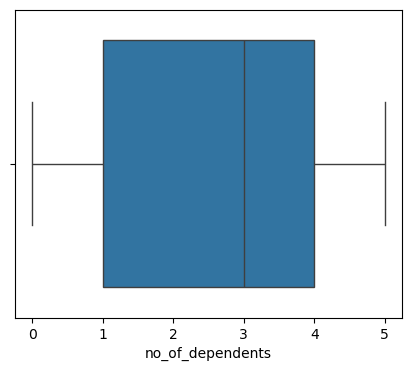

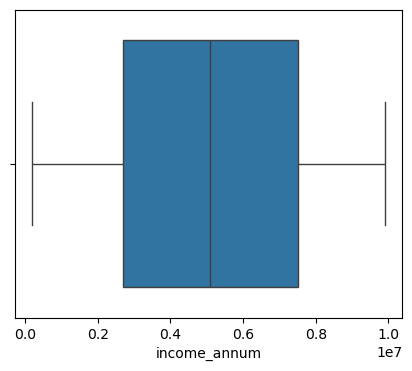

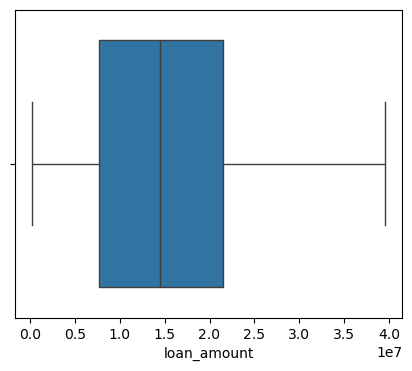

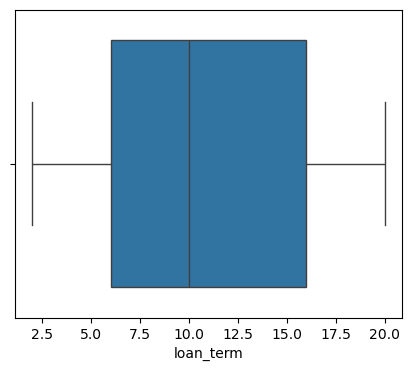

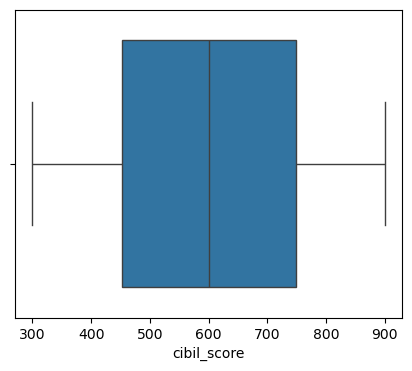

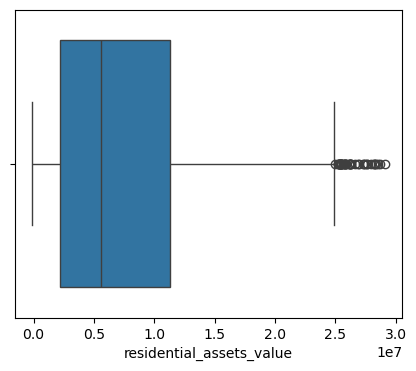

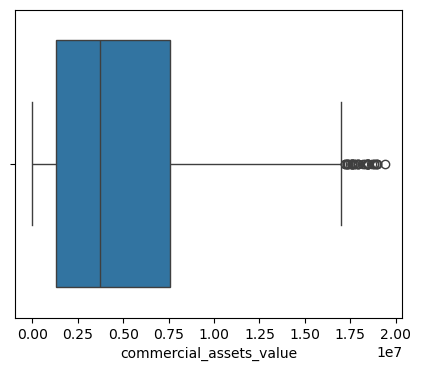

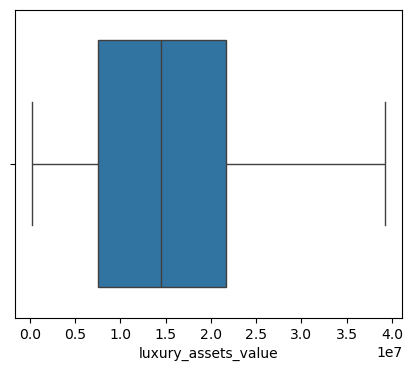

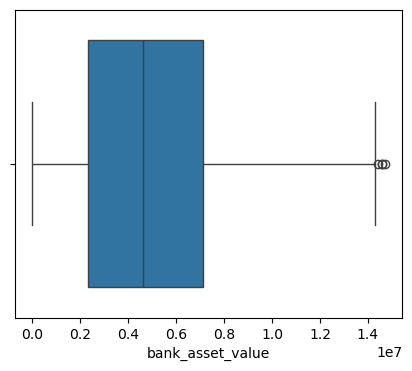

In [13]:
for col in df[numerical]:
    plt.figure(figsize=(5,4))
    sns.boxplot(df,x=col)

# <center>====Handling outliers by IQR method====</center>

In [14]:
outlier_cols=['residential_assets_value','commercial_assets_value','bank_asset_value']

In [15]:
def iqr_method(data,columns):
    data=df
    for col in columns:
        p25=df[col].quantile(0.25)
        p75=df[col].quantile(0.75)



        iqr=p75-p25
        uf=p75+1.5*iqr
        lf=p25-1.5*iqr

        df[(df[col]>uf) | (df[col]<lf)].shape

        df[(df[col]<uf) & (df[col]>lf)].shape

        df[col]=np.where(df[col]>uf,uf,np.where(df[col]<lf,lf,df[col]))




In [16]:
iqr_method(df,outlier_cols)

# <center><br>Distribution Curves Before and After Handling Outliers</br><center>

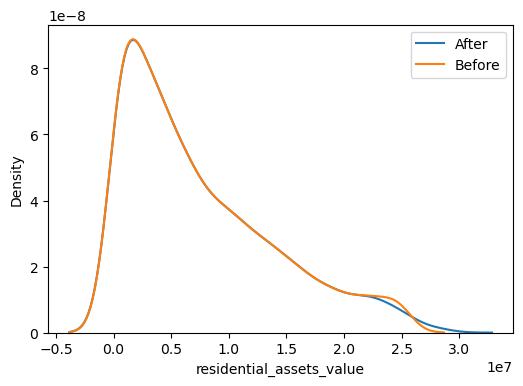

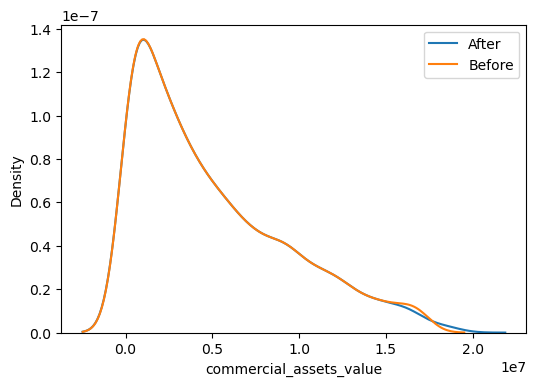

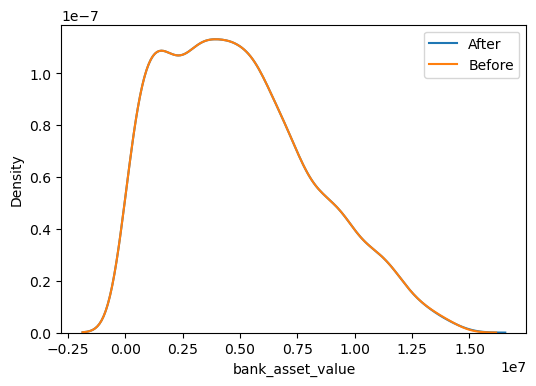

In [17]:
plt.figure(figsize=(6,4))
sns.kdeplot(data,x='residential_assets_value',label='After')
sns.kdeplot(df,x='residential_assets_value',label='Before')
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(data,x='commercial_assets_value',label='After')
sns.kdeplot(df,x='commercial_assets_value',label='Before')
plt.legend()

plt.figure(figsize=(6,4))
sns.kdeplot(data,x='bank_asset_value',label='After')
sns.kdeplot(df,x='bank_asset_value',label='Before')
plt.legend()

# <center><br>Boxplot Before and After Handling Outliers</br><center>

<Axes: xlabel='bank_asset_value'>

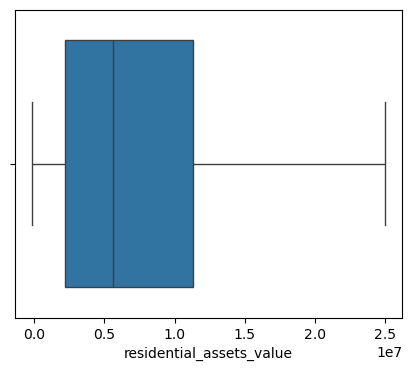

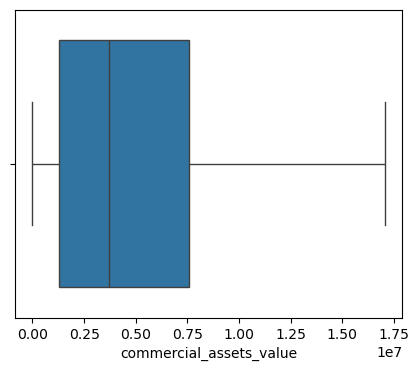

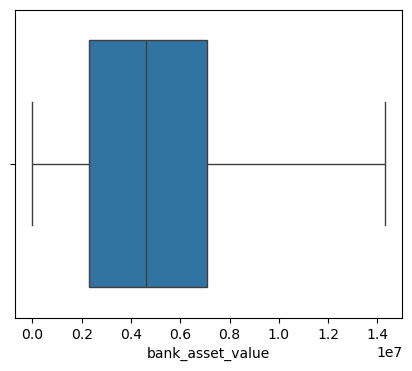

In [18]:
plt.figure(figsize=(5,4))
sns.boxplot(df,x='residential_assets_value')

plt.figure(figsize=(5,4))
sns.boxplot(df,x='commercial_assets_value')

plt.figure(figsize=(5,4))
sns.boxplot(df,x='bank_asset_value')

In [19]:
# spliting columns

x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [21]:
x_train.shape

(2988, 11)

In [22]:
x_test.shape

(1281, 11)

# <center>======Handling missing values on training data=====<center>

In [23]:
 x_train.isnull().sum()

no_of_dependents              0
education                   440
self_employed               238
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    269
commercial_assets_value      92
luxury_assets_value         172
bank_asset_value            306
dtype: int64

# on categorical columns

# <center>Random Value Imputation on education column<center>

In [24]:
Labels=x_train['education'].value_counts().index
Labels

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [25]:
non_null=x_train['education'].notnull().sum()
non_null

2548

In [26]:
Not_gra=x_train[x_train['education']=='Not Graduate'].shape[0]
Not_gra

1272

In [27]:
gra=x_train[x_train['education']=='Graduate'].shape[0]
gra

1276

In [28]:
pro_not_gra=Not_gra/non_null
pro_gra=gra/non_null

In [29]:
print(pro_not_gra)
print()
print(pro_gra)

0.49921507064364207

0.5007849293563579


In [30]:
x_train['education'].fillna(np.random.choice(Labels,p=(pro_not_gra,pro_gra)),inplace=True)

# <center>Random Value Imputation on self_employed  column</center>

In [31]:
Labels_se=x_train['self_employed'].value_counts().index
Labels_se

Index(['Yes', 'No'], dtype='object', name='self_employed')

In [32]:
not_null=x_train['self_employed'].notnull().sum()
not_null

2750

In [33]:
yes=x_train[x_train['self_employed']=='Yes'].shape[0]
yes

1384

In [34]:
no=x_train[x_train['self_employed']=='No'].shape[0]
no

1366

In [35]:
pro_yes=yes/not_null
pro_no=no/not_null

In [36]:
print(pro_yes)
print(pro_no)

0.5032727272727273
0.49672727272727274


In [37]:
x_train['self_employed'].fillna(np.random.choice(Labels_se,p=(pro_yes,pro_no)),inplace=True)

# <center>Random Value Imputation on numerical columns<center>

In [38]:
x_train[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    269
commercial_assets_value      92
luxury_assets_value         172
bank_asset_value            306
dtype: int64

In [39]:
def randomvalueimputertest(data,columns):
    df=data
    for col in columns:
        missing_vals=x_train[col].isnull().sum()
        pool=x_train[col].dropna().sample(missing_vals).values
        x_train[col][x_train[col].isnull()]=pool

In [40]:
missing_columns=x_train[numerical].iloc[:,5:]
missing_columns.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4196,1800000.0,1800000.0,17700000.0,11000000.0
865,10000000.0,10900000.0,20400000.0,6900000.0
2132,15200000.0,3200000.0,12200000.0,6500000.0
201,200000.0,5600000.0,12200000.0,2200000.0
1485,5000000.0,1500000.0,5900000.0,1600000.0


In [41]:
randomvalueimputertest(x_train,missing_columns)

C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\656847691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col][x_train[col].isnull()]=pool
C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\656847691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col][x_train[col].isnull()]=pool
C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\656847691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [42]:
x_train.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

# <center>====Incoding and Scaling training data====<center>

In [43]:
x_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4196,2,Graduate,Yes,7800000,28900000,14,646,1800000.0,1800000.0,17700000.0,11000000.0
865,5,Not Graduate,Yes,6400000,20300000,16,348,10000000.0,10900000.0,20400000.0,6900000.0
2132,0,Graduate,Yes,5900000,15200000,16,399,15200000.0,3200000.0,12200000.0,6500000.0
201,2,Not Graduate,Yes,3800000,8900000,16,389,200000.0,5600000.0,12200000.0,2200000.0
1485,1,Not Graduate,Yes,1800000,5500000,10,426,5000000.0,1500000.0,5900000.0,1600000.0


In [44]:
ohe=OneHotEncoder()
rs=RobustScaler()

In [45]:
list[numerical]

list[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]

In [46]:
list[categorical]

list[['education', 'self_employed', 'loan_status']]

In [47]:
col_trans=ColumnTransformer(transformers=[('rs',RobustScaler(),numerical),
                                          ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore')
                                           ,['education','self_employed'])],
                                remainder='passthrough')

In [48]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('rs', RobustScaler(),
                                 ['no_of_dependents', 'income_annum',
                                  'loan_amount', 'loan_term', 'cibil_score',
                                  'residential_assets_value',
                                  'commercial_assets_value',
                                  'luxury_assets_value', 'bank_asset_value']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['education', 'self_employed'])])

In [49]:
x_train_enc=col_trans.fit_transform(x_train)

In [50]:
x_train_enc=pd.DataFrame(x_train_enc,columns=col_trans.get_feature_names_out())
x_train_enc.head()

,rs__no_of_dependents,rs__income_annum,rs__loan_amount,rs__loan_term,rs__cibil_score,rs__residential_assets_value,rs__commercial_assets_value,rs__luxury_assets_value,rs__bank_asset_value,ohe__education_Not Graduate,ohe__self_employed_Yes
0,-0.333333,0.571429,1.035971,0.4,0.161480,-0.402174,-0.301587,0.222222,1.382979,0.0,1.0
1,0.666667,0.285714,0.417266,0.6,-0.841043,0.489130,1.142857,0.409722,0.510638,1.0,1.0
2,-1.000000,0.183673,0.050360,0.6,-0.669470,1.054348,-0.079365,-0.159722,0.425532,0.0,1.0
3,-0.333333,-0.244898,-0.402878,0.6,-0.703112,-0.576087,0.301587,-0.159722,-0.489362,1.0,1.0
4,-0.666667,-0.653061,-0.647482,0.0,-0.578638,-0.054348,-0.349206,-0.597222,-0.617021,1.0,1.0


In [51]:
x_train_enc.columns=x_train.columns

In [52]:
x_train_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.333333,0.571429,1.035971,0.4,0.161480,-0.402174,-0.301587,0.222222,1.382979,0.0,1.0
1,0.666667,0.285714,0.417266,0.6,-0.841043,0.489130,1.142857,0.409722,0.510638,1.0,1.0
2,-1.000000,0.183673,0.050360,0.6,-0.669470,1.054348,-0.079365,-0.159722,0.425532,0.0,1.0
3,-0.333333,-0.244898,-0.402878,0.6,-0.703112,-0.576087,0.301587,-0.159722,-0.489362,1.0,1.0
4,-0.666667,-0.653061,-0.647482,0.0,-0.578638,-0.054348,-0.349206,-0.597222,-0.617021,1.0,1.0


# <center>Incoding y_train<center>

In [53]:
y_train

4196    Approved
865     Rejected
2132    Rejected
201     Rejected
1485    Rejected
          ...   
3455    Rejected
3315    Rejected
4001    Rejected
1599    Approved
3627    Approved
Name: loan_status, Length: 2988, dtype: object

In [54]:
le=LabelEncoder()

In [55]:
y_train=le.fit_transform(y_train)

In [56]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

# <center>======Handling missing values on testing data=====<center>

In [57]:
x_test.isnull().sum()

no_of_dependents              0
education                   200
self_employed               103
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    115
commercial_assets_value      36
luxury_assets_value          84
bank_asset_value            120
dtype: int64

# On categorical columns

# <center>Random Value Imputation on education column<center>

In [58]:
Labels=x_test['education'].value_counts().index
Labels

Index(['Not Graduate', 'Graduate'], dtype='object', name='education')

In [59]:
non_null=x_test['education'].notnull().sum()
non_null

1081

In [60]:
Not_gra=x_test[x_test['education']=='Not Graduate'].shape[0]
Not_gra

547

In [61]:
gra=x_test[x_test['education']=='Graduate'].shape[0]
gra

534

In [62]:
pro_not_gra=Not_gra/non_null
pro_gra=gra/non_null

In [63]:
print(pro_not_gra)
print()
print(pro_gra)

0.5060129509713228

0.4939870490286771


In [64]:
x_test['education'].fillna(np.random.choice(Labels,p=(pro_not_gra,pro_gra)),inplace=True)

# <center>Random Value Imputation on self_employed  column</center>

In [65]:
Labels_se=x_test['self_employed'].value_counts().index
Labels_se

Index(['Yes', 'No'], dtype='object', name='self_employed')

In [66]:
not_null=x_test['self_employed'].notnull().sum()
not_null

1178

In [67]:
yes=x_test[x_test['self_employed']=='Yes'].shape[0]
yes

593

In [68]:
no=x_test[x_test['self_employed']=='No'].shape[0]
no

585

In [69]:
pro_yes=yes/not_null
pro_no=no/not_null

In [70]:
print(pro_yes)
print(pro_no)

0.5033955857385399
0.4966044142614601


In [71]:
x_test['self_employed'].fillna(np.random.choice(Labels_se,p=(pro_yes,pro_no)),inplace=True)

In [72]:
x_test.isnull().sum()

no_of_dependents              0
education                     0
self_employed                 0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    115
commercial_assets_value      36
luxury_assets_value          84
bank_asset_value            120
dtype: int64

# <center>====Random Value Imputation on numerical columns====<center>

In [73]:

x_test[numerical].isnull().sum()

no_of_dependents              0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value    115
commercial_assets_value      36
luxury_assets_value          84
bank_asset_value            120
dtype: int64

In [74]:
def randomvalueimputertest(data,columns):
    df=data
    for col in columns:
        missing_vals=x_test[col].isnull().sum()
        pool=x_test[col].dropna().sample(missing_vals).values
        x_test[col][x_test[col].isnull()]=pool

In [75]:
missing_columns=x_test[numerical].iloc[:,5:]
missing_columns.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3855,11400000.0,14800000.0,17200000.0,5700000.0
1584,10000000.0,12700000.0,31100000.0,7000000.0
1193,400000.0,300000.0,7100000.0,1200000.0
869,3800000.0,3000000.0,25100000.0,7400000.0
3552,NaN,5400000.0,13000000.0,3100000.0


In [76]:
randomvalueimputertest(x_test,missing_columns)

C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\2673026260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col][x_test[col].isnull()]=pool
C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\2673026260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col][x_test[col].isnull()]=pool
C:\Users\manish singh\AppData\Local\Temp\ipykernel_18500\2673026260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x

In [77]:
x_test.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
dtype: int64

# <center>====Incoding and Scaling testing data====<center>

In [78]:
x_test.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3855,2,Graduate,Yes,8500000,25600000,16,714,11400000.0,14800000.0,17200000.0,5700000.0
1584,0,Graduate,No,9500000,35300000,6,605,10000000.0,12700000.0,31100000.0,7000000.0
1193,2,Not Graduate,Yes,2100000,5600000,16,426,400000.0,300000.0,7100000.0,1200000.0
869,3,Graduate,No,6600000,22100000,4,455,3800000.0,3000000.0,25100000.0,7400000.0
3552,0,Graduate,No,5200000,17800000,18,558,7100000.0,5400000.0,13000000.0,3100000.0


In [79]:
x_test_enc=col_trans.transform(x_test)

In [80]:
x_test_enc=pd.DataFrame(x_test_enc,columns=col_trans.get_feature_names_out())
x_test_enc.head()

,rs__no_of_dependents,rs__income_annum,rs__loan_amount,rs__loan_term,rs__cibil_score,rs__residential_assets_value,rs__commercial_assets_value,rs__luxury_assets_value,rs__bank_asset_value,ohe__education_Not Graduate,ohe__self_employed_Yes
0,-0.333333,0.714286,0.798561,0.6,0.390244,0.641304,1.761905,0.187500,0.255319,0.0,1.0
1,-1.000000,0.918367,1.496403,-0.4,0.023549,0.489130,1.428571,1.152778,0.531915,0.0,0.0
2,-0.333333,-0.591837,-0.640288,0.6,-0.578638,-0.554348,-0.539683,-0.513889,-0.702128,1.0,1.0
3,0.000000,0.326531,0.546763,-0.6,-0.481077,-0.184783,-0.111111,0.736111,0.617021,0.0,0.0
4,-1.000000,0.040816,0.237410,0.8,-0.134567,0.173913,0.269841,-0.104167,-0.297872,0.0,0.0


In [81]:
x_test_enc.columns=x_train.columns

In [82]:
x_test_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.333333,0.714286,0.798561,0.6,0.390244,0.641304,1.761905,0.187500,0.255319,0.0,1.0
1,-1.000000,0.918367,1.496403,-0.4,0.023549,0.489130,1.428571,1.152778,0.531915,0.0,0.0
2,-0.333333,-0.591837,-0.640288,0.6,-0.578638,-0.554348,-0.539683,-0.513889,-0.702128,1.0,1.0
3,0.000000,0.326531,0.546763,-0.6,-0.481077,-0.184783,-0.111111,0.736111,0.617021,0.0,0.0
4,-1.000000,0.040816,0.237410,0.8,-0.134567,0.173913,0.269841,-0.104167,-0.297872,0.0,0.0


# <center>Incoding y_test<center>

In [83]:
y_test

3855    Approved
1584    Approved
1193    Rejected
869     Approved
3552    Approved
          ...   
3145    Approved
1266    Approved
4118    Approved
3816    Approved
538     Approved
Name: loan_status, Length: 1281, dtype: object

In [84]:
y_test=le.transform(y_test)

In [85]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
x_train_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.333333,0.571429,1.035971,0.4,0.161480,-0.402174,-0.301587,0.222222,1.382979,0.0,1.0
1,0.666667,0.285714,0.417266,0.6,-0.841043,0.489130,1.142857,0.409722,0.510638,1.0,1.0
2,-1.000000,0.183673,0.050360,0.6,-0.669470,1.054348,-0.079365,-0.159722,0.425532,0.0,1.0
3,-0.333333,-0.244898,-0.402878,0.6,-0.703112,-0.576087,0.301587,-0.159722,-0.489362,1.0,1.0
4,-0.666667,-0.653061,-0.647482,0.0,-0.578638,-0.054348,-0.349206,-0.597222,-0.617021,1.0,1.0


In [87]:
x_test_enc.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.333333,0.714286,0.798561,0.6,0.390244,0.641304,1.761905,0.187500,0.255319,0.0,1.0
1,-1.000000,0.918367,1.496403,-0.4,0.023549,0.489130,1.428571,1.152778,0.531915,0.0,0.0
2,-0.333333,-0.591837,-0.640288,0.6,-0.578638,-0.554348,-0.539683,-0.513889,-0.702128,1.0,1.0
3,0.000000,0.326531,0.546763,-0.6,-0.481077,-0.184783,-0.111111,0.736111,0.617021,0.0,0.0
4,-1.000000,0.040816,0.237410,0.8,-0.134567,0.173913,0.269841,-0.104167,-0.297872,0.0,0.0


# <center>====Building Model====</center>

In [88]:
parameter={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [89]:
dt=DecisionTreeClassifier()

In [90]:
cv=GridSearchCV(dt,param_grid=parameter,cv=5,scoring='accuracy')

In [91]:
cv.fit(x_train_enc,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [92]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [93]:
y_pred=cv.predict(x_test_enc)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
#checking accuracy of model

score=accuracy_score(y_pred,y_test)

In [96]:
score

0.9484777517564403

In [97]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       764
           1       0.99      0.88      0.93       517

    accuracy                           0.95      1281
   macro avg       0.96      0.94      0.95      1281
weighted avg       0.95      0.95      0.95      1281

